# Anomaly Analysis

In [20]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [21]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  
media_volt=reference_volt_curves["media"]
reference_curr_curves= pd.read_pickle("../data/reference/reference_current_curves.pkl")  
media_curr=reference_curr_curves["media"]

In [22]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [23]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

## Analisi anomalie di Voltage

In [24]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

### Plot delle curve di uno spotname casuale

In [53]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

#### Plot sulla base di voltage_drop

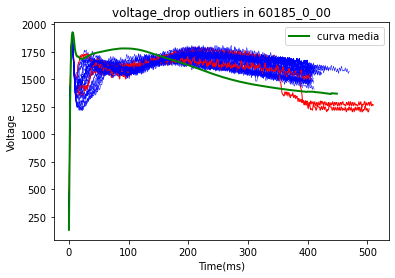

In [60]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("voltage_drop outliers in 60185_0_00")
plt.legend();

#### Plot sulla base di voltage_spike

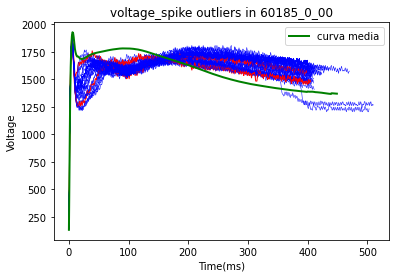

In [61]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_spike"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("voltage_spike outliers in 60185_0_00")
plt.legend();

#### Plot sulla base di %volt_anomalies

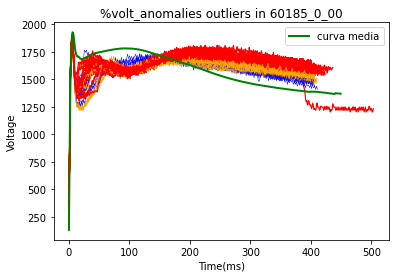

In [62]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["%volt_anomalies"][i]>40:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1.2)
    if 10<val_indice["%volt_anomalies"][i]<40:
        colore="orange"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%volt_anomalies"][i]<10:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("%volt_anomalies outliers in 60185_0_00")
plt.legend();

#### Plot sulla base di iForest

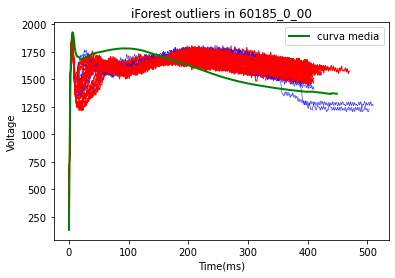

In [58]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["iForest_volt"][i]==1:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1) 
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("iForest outliers in 60185_0_00")
plt.legend(); 

#### Plot sulla base di LOF_volt

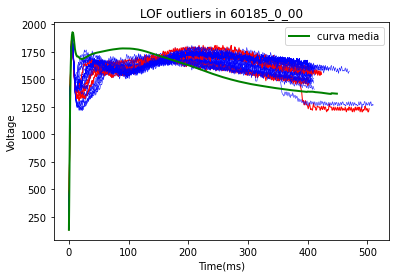

In [59]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["LOF_volt"][i]==1:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1) 
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("LOF outliers in 60185_0_00")
plt.legend(); 

### Analisi degli spotName con più curve  outliers* (voltage)
*Con curve anomale si intendono quelle che presentano voltage_drop=True

In [74]:
out_volt=(df_volt[["voltage_drop"]].groupby("spotName").sum()/df_volt[["voltage_drop"]].groupby("spotName").count()*100).sort_values(by=["voltage_drop"],ascending=False)
out_volt.head(6)

,voltage_drop
spotName,
60001_0_00,98.860399
60003_0_00,98.773006
60026_0_00,96.705776
60049_0_00,87.381443
60020_0_00,75.772098
60030_0_00,72.445820


##### Plot (100 curve) sulla base di voltage_drop degli spotName più anomali

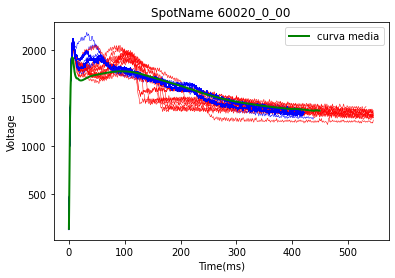

In [31]:
val_indice=df_volt.loc[['60020_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(100):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60020_0_00")
plt.legend();

### Analisi degli spotName con meno curve  outliers* (voltage)
Con curve anomale si intendono quelle che presentano voltage_drop=True

In [32]:
(df_volt[["voltage_drop"]].groupby("spotName").sum()/df_volt[["voltage_drop"]].groupby("spotName").count()).sort_values(by=["voltage_drop"],ascending=True).head(6)

,voltage_drop
spotName,
60160_0_00,0.000000
60161_0_00,0.000000
60140_0_00,0.000415
60043_0_00,0.000421
60118_0_00,0.000440
60169_0_00,0.000510


##### Plot (100 curve) sulla base di voltage_drop degli spotName meno anomali

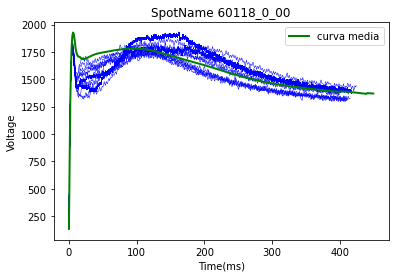

In [33]:
val_indice=df_volt.loc[['60118_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(100):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60118_0_00")
plt.legend();

## Analisi anomalie di Current

In [34]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

### Plot delle curve di uno spotname casuale

In [66]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

#### Plot sulla base di %current_anomalies

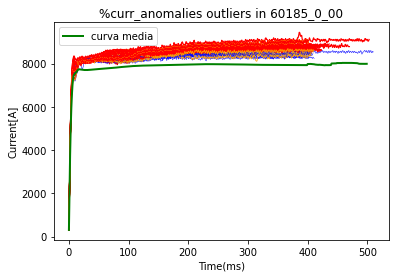

In [70]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["%current_anomalies"][i]>50:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1.2)
    if 20<val_indice["%current_anomalies"][i]<50:
        colore="orange"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%current_anomalies"][i]<20:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.title("%curr_anomalies outliers in 60185_0_00")
plt.legend(); 

#### Plot sulla base di iForest

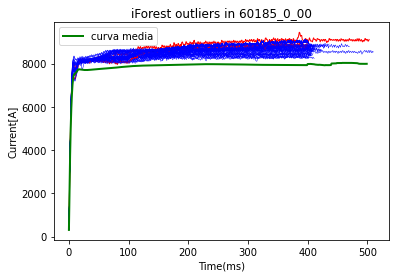

In [71]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)  
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.title("iForest outliers in 60185_0_00")
plt.legend(); 

#### Plot sulla base del LOF

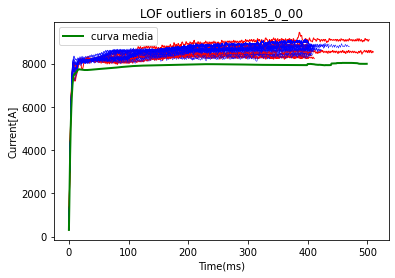

In [72]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["LOF_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)  
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.title("LOF outliers in 60185_0_00")
plt.legend(); 

### Analisi degli spotName con più curve  outliers* (current)
*Con curve anomale si intendono quelle che presentano iForest_curr=-1

In [82]:
out_curr=(df_curr[["iForest_curr"]][df_curr["iForest_curr"]==-1].groupby("spotName").count()/df_curr[["iForest_curr"]].groupby("spotName").count()*100).sort_values(by=["iForest_curr"],ascending=False)
out_curr.head()

,iForest_curr
spotName,
60049_0_00,93.814433
60184_0_00,90.511674
60169_0_00,80.717703
60166_0_00,75.683371
60028_0_00,65.846034


##### Plot (100 curve) sulla base di iForest_curr degli spotName più anomali

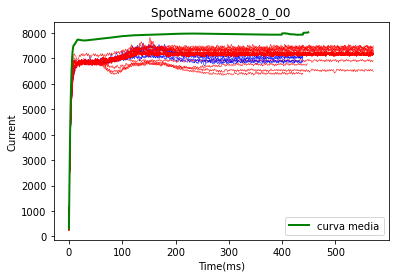

In [95]:
val_indice=df_curr.loc[['60028_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Current")
for i in range(100):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_curr[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60028_0_00")
plt.legend();

### Analisi degli spotName con meno curve  outliers* (current)
*Con curve anomale si intendono quelle che presentano iForest_curr=-1

In [81]:
(df_curr[["iForest_curr"]][df_curr["iForest_curr"]==-1].groupby("spotName").count()/df_curr[["iForest_curr"]].groupby("spotName").count()).sort_values(by=["iForest_curr"],ascending=True).head(6)

,iForest_curr
spotName,
60058_0_00,0.000399
60053_0_00,0.000417
60091_0_00,0.000419
60052_0_00,0.000425
60077_0_00,0.000443
60059_0_00,0.000456


##### Plot (100 curve) sulla base di iForest_curr degli spotName meno anomali

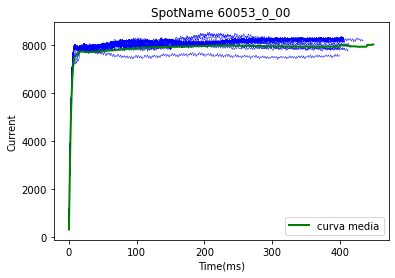

In [20]:
val_indice=df_curr.loc[['60053_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Current")
for i in range(100):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_curr[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60053_0_00")
plt.legend();

# Scatterplot spotName 

In [109]:
spotnames=out_volt.merge(out_curr,left_index=True, right_index=True)
spotnames=spotnames[(spotnames["voltage_drop"]>50) | (spotnames["iForest_curr"]>50)]
spotnames.head()

,voltage_drop,iForest_curr
spotName,,
60001_0_00,98.860399,0.474834
60003_0_00,98.773006,3.128834
60026_0_00,96.705776,NaN
60049_0_00,87.381443,93.814433
60020_0_00,75.772098,0.532481


Text(0, 0.5, '%Current Anomalies')

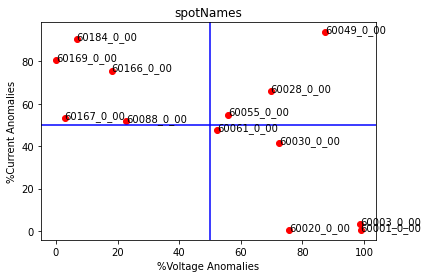

In [111]:
fig,ax=plt.subplots()
ax.scatter(spotnames["voltage_drop"],spotnames["iForest_curr"],c="red")
plt.axhline(y = 50, color = 'b', linestyle = '-')
plt.axvline(x = 50, color = 'b', linestyle = '-')
for i, txt in enumerate(list(spotnames.index)):
    ax.annotate(txt, (spotnames["voltage_drop"][i], spotnames["iForest_curr"][i]))
plt.title("spotNames")
plt.xlabel("%Voltage Anomalies")
plt.ylabel("%Current Anomalies")